In [4]:
print "Hello World" # Kill the whitespace effect

Hello World


In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="white",rc={"figure.figsize":(8, 8)})


# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [6]:
billboard = pd.read_csv('../assets/billboard.csv') # read in the csv

In [7]:
billboard.dtypes # determine datatypes of all the columns

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.wek          float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
                    ...   
x47th.week         float64
x48th.week         float64
x49th.week         float64
x50th.week         float64
x51st.week         float64
x52nd.week         float64
x

*Most of the columns are in fine order. Only a few issues are present

In [8]:
billboard.head(2)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
billboard.tail(2)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
billboard.shape

(317, 83)

In [11]:
pd.unique(billboard.year) # Count unique items in the year section of the array

array([2000])

In [12]:
#len(pd.unique(billboard.track)) # Determine number of unique tracks (316)
#len(pd.unique(billboard.genre)) # Determine unique genres (11)
pd.unique(billboard.genre)      # R&B shows up twice (R&B and R&B\n)
#pd.unique(billboard.genre)      # Show names of unique genres

#billboard.groupby(['genre', 'time'])['time'].count()

array(['Rock', 'Latin', 'Country', 'Rap', 'Pop', 'Electronica', 'Jazz',
       'R&B', 'R&B\n', 'Reggae', 'Gospel'], dtype=object)

In [13]:
pd.unique(billboard['date.peaked'])

array(['2000-11-18', '2000-04-08', '2000-01-29', '2000-09-16',
       '2000-10-14', '2000-08-26', '2000-03-18', '2000-06-24',
       '2000-08-12', '2000-03-04', '2000-07-29', '2000-01-15',
       '2000-07-15', '2000-11-11', '2000-06-17', '2000-07-22',
       '2000-02-19', '2000-04-22', '2000-12-02', '2000-12-30',
       '2000-05-06', '2000-06-03', '2000-09-30', '2000-08-19',
       '2000-05-20', '2000-07-01', nan, '2000-02-12', '2000-04-15',
       '2000-11-25', '2000-12-09', '2000-01-22', '2000-01-08',
       '2000-09-02', '2000-10-07', '2000-09-09', '2000-06-10',
       '2000-02-05', '2000-10-28', '2000-02-26', '2000-04-01',
       '2000-05-27', '2000-07-08', '2000-01-01', '2000-05-13',
       '2000-12-16', '2000-11-04', '2000-03-25', '2000-12-23',
       '2000-10-21', '2000-09-23', '2000-08-05', '2000-03-11', '2000-04-29'], dtype=object)

In [14]:
sevsixrng = range(1,77)        # Create list of range from 1 - 76

In [15]:
# billboard['x2nd.week'].mean() #71.17307692307692

billboard.describe()  # Find the mean for all the weeks present


,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*From above it looks like there are many of the week columns that contain no values. Will need to confirm, and if that is the case then remove the associated items
Additionally there seems to be an **increasing** mean in the beginning of the weeks columns along with a **larger** standard deviation. Likely meaning that some tracks are doing really well and others are not, causing there to be a large spread of the positions of the tracks as time goes on.*

##### Create a data dictionary for the data set.

In [15]:
datadict = {
    'datadesc' : 'Billboard top tracks for the year 2000',
    'year' : 'The year the track was released',
    'artist.inverted' : 'Name of the artist, inverted',
    'track' : 'Name of the track',
    'time' : 'Length of track in minutes:seconds',
    'genre' : {
        'Rock' : 'Rock and Roll',
        'Latin' : 'Spanish language specific music',
        'Country' : 'American Popular Music, Roots in Folk/Western',
        'Rap' : 'Rythmn and Poetry',
        'Electronica' : 'Electronic-Based (Synthesizer) Music',
        'Jazz' : 'Swing Note/Improvisation Based Music',
        'Reggae' : 'Music insipred by Mento and Calypso',
        'Gospel' : 'Christian Music' 
              },
    'dateentered' : 'Date the track was entered into Billboard',
    'datepeaked' : 'Date the Song Reached It\'s Highest Position on Billboard Chart',
    '(1-76)weeks' : 'List of the position the song was on starting from the first week it was on the charts'
}

pd.DataFrame(datadict, index=datadict.keys())

,(1-76)weeks,artist.inverted,datadesc,dateentered,datepeaked,genre,time,track,year
datepeaked,List of the position the song was on starting ...,"Name of the artist, inverted",Billboard top tracks for the year 2000,Date the track was entered into Billboard,Date the Song Reached It's Highest Position on...,NaN,Length of track in minutes:seconds,Name of the track,The year the track was released
genre,List of the position the song was on starting ...,"Name of the artist, inverted",Billboard top tracks for the year 2000,Date the track was entered into Billboard,Date the Song Reached It's Highest Position on...,NaN,Length of track in minutes:seconds,Name of the track,The year the track was released
(1-76)weeks,List of the position the song was on starting ...,"Name of the artist, inverted",Billboard top tracks for the year 2000,Date the track was entered into Billboard,Date the Song Reached It's Highest Position on...,NaN,Length of track in minutes:seconds,Name of the track,The year the track was released
time,List of the position the song was on starting ...,"Name of the artist, inverted",Billboard top tracks for the year 2000,Date the track was entered into Billboard,Date the Song Reached It's Highest Position on...,NaN,Length of track in minutes:seconds,Name of the track,The year the track was released
year,List of the position the song was on starting ...,"Name of the artist, inverted",Billboard top tracks for the year 2000,Date the track was entered into Billboard,Date the Song Reached It's Highest Position on...,NaN,Length of track in minutes:seconds,Name of the track,The year the track was released
track,List of the position the song was on starting ...,"Name of the artist, inverted",Billboard top tracks for the year 2000,Date the track was entered into Billboard,Date the Song Reached It's Highest Position on...,NaN,Length of track in minutes:seconds,Name of the track,The year the track was released
dateentered,List of the position the song was on starting ...,"Name of the artist, inverted",Billboard top tracks for the year 2000,Date the track was entered into Billboard,Date the Song Reached It's Highest Position on...,NaN,Length of track in minutes:seconds,Name of the track,The year the track was released
datadesc,List of the position the song was on starting ...,"Name of the artist, inverted",Billboard top tracks for the year 2000,Date the track was entered into Billboard,Date the Song Reached It's Highest Position on...,NaN,Length of track in minutes:seconds,Name of the track,The year the track was released
artist.inverted,List of the position the song was on starting ...,"Name of the artist, inverted",Billboard top tracks for the year 2000,Date the track was entered into Billboard,Date the Song Reached It's Highest Position on...,NaN,Length of track in minutes:seconds,Name of the track,The year the track was released


##### Write a brief description of your data, and any interesting observations you've made thus far. 

The data is from the billboard music agency from the year 2000. It is not constrained to a single genre of music. The information about the music that is included includes the 

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. 

In [16]:
columns = billboard.columns

for col in columns: # go through all the column names
    if any([char in col for char in ['$','&','%','#','.','x']]):
        newcol = ''.join([char for char in col if char not in ['$','&','%','#','.','x']])
        billboard.rename(columns={col:newcol}, inplace=True)

billboard.head(1)

,year,artistinverted,track,time,genre,dateentered,datepeaked,1stweek,2ndweek,3rdweek,...,67thweek,68thweek,69thweek,70thweek,71stweek,72ndweek,73rdweek,74thweek,75thweek,76thweek
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Before proceeding want to make sure that there are no repeated tracks, and if there are make sure that they are from different artists*

In [23]:
billboard['track'].value_counts()>=2

#repeat_series = pd.DataFrame(new_series)

#repeat_series[repeat_series['track']== True] 

/Users/sebozek/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


IndexingError: Unalignable boolean Series key provided

In [18]:
billboard[billboard['track'] == 'Where I Wanna Be']

,year,artistinverted,track,time,genre,dateentered,datepeaked,1stweek,2ndweek,3rdweek,...,67thweek,68thweek,69thweek,70thweek,71stweek,72ndweek,73rdweek,74thweek,75thweek,76thweek
118,2000,"Jones, Donell",Where I Wanna Be,6:22,Rock,2000-04-22,2000-07-08,81,71.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,2000,"Sheist, Shade",Where I Wanna Be,4:16,Rap,2000-11-11,2000-11-18,96,95.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*The tracks were found to be from different artists and different albums. No other track names were found to repeat. Could be that there were misspellings of repeated tracks*

In [16]:
cl_billboard = billboard.dropna(axis=1,how='all') # drop all columns that contain exclusively 'NaN' values

cl_billboard.shape # assess new shape from original of (317, 83)

(317, 72)

*11 columns were dropped from the original dataframe*

*The genre chart had two instances of R&B, one with a '\n' and one without. Will need to replace that value with the proper R&B, other than that there was no major issue with the genre of the music*

*Following step should be to drop all of the columns that contain no data in them, or are filled exclusively with Not a Number values*

In [29]:
billboard[billboard['genre'] == 'R&B\n'] = billboard[billboard['genre'] == 'R&B']

In [30]:
genre_counts = pd.value_counts(billboard['genre']) # Create DF of genre counts

*In order to investigate the different time distributions have to convert the string into an integer. Could do by splitting the item on the colon, then multiplying the first item by 60. Could also index the string.*

In [17]:
test_bill = billboard

st = '8:25'
def min_sec(st):
    '''Takes string expressing minutes and converts it to seconds as integers'''
    st = str(st)
    return int(st[:-3:1])*60 + int(st[-2:]) # multiply minutes by 60, then add seconds

min_sec(st)

505

*After function was written it needs to be applied to the time column on the dataframe while preserving the rest of the dataframe*

In [18]:
# test_bill['time'].apply(min_sec)
billboard['time']=billboard['time'].apply(min_sec)

*Before converting to long list want to remove the endings to the weeks columns making them a range from 1-72*

In [19]:
billboard.shape

(317, 83)

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [25]:
weeks72 = range(1,77)

# billboard.columns.values

keep_cols = ['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked']

new_cols = keep_cols + weeks72 # make list of new columns

In [27]:
billboard.columns = new_cols
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,1,2,3,...,67,68,69,70,71,72,73,74,75,76
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
bill_long = pd.melt(billboard,
         id_vars=keep_cols,
         value_vars=weeks72,
         var_name='Week',
         value_name='Chart Position'
)

In [ ]:
bill_long.head(2)

## Step 3: Visualize your data.

##### Using a plotting utility of your choice, create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

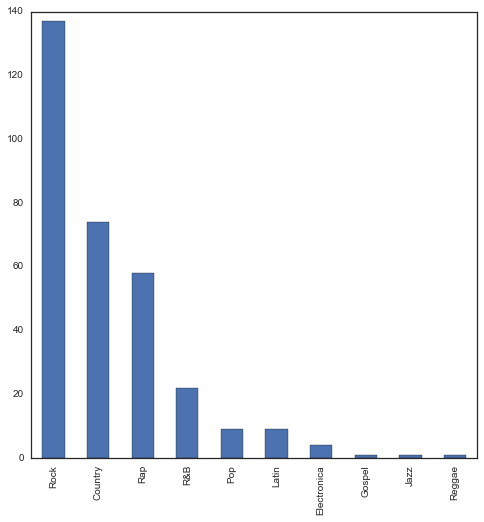

In [31]:
genre_counts.plot.bar()

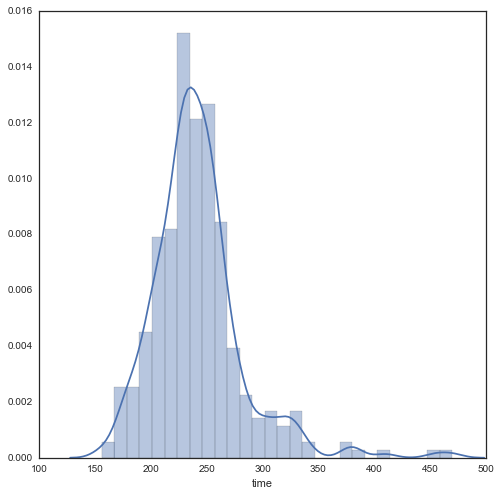

In [41]:
bbtimes = billboard['time'].dropna()
sns.distplot(bbtimes)

In [42]:
bbtimes.describe()

count    316.000000
mean     241.832278
std       41.128529
min      156.000000
25%      218.750000
50%      236.000000
75%      257.000000
max      470.000000
Name: time, dtype: float64

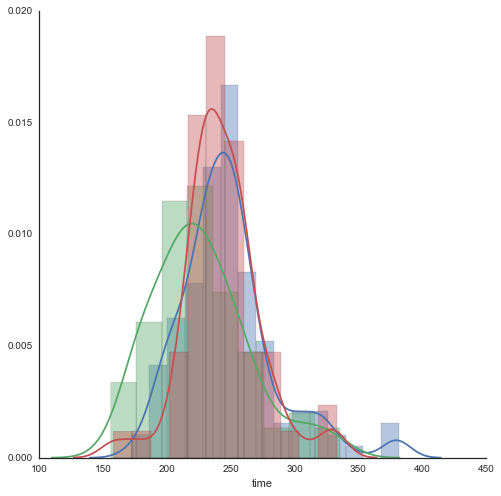

In [36]:
rock_times = billboard.time[billboard['genre'] =='Rock']
country_times = billboard.time[billboard['genre'] =='Country']
rap_times = billboard.time[billboard['genre'] == 'Rap']

sns.distplot(rock_times)
sns.distplot(country_times)
sns.distplot(rap_times)

sns.despine()

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for roughly 800-1,000 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 600 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 

[UCLA - Data Cleaning 101](http://www.ats.ucla.edu/stat/sas/library/nesug99/ss123.pdf)  
[Data Cleaning Problems and Current Approach](http://betterevaluation.org/sites/default/files/data_cleaning.pdf)  
[Data Cleaning: Detecting, Diagnosing, and Editing Data Abnormalities](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1198040/pdf/pmed.0020267.pdf)  
[Microsoft - Data Cleaning](http://research.microsoft.com/en-us/projects/datacleaning/)  
[Panda Chapter 2 - Data Cleaning](http://www.tulane.edu/~panda2/Analysis2/datclean/dataclean.htm)  
[StatsSoft Data Mining, Data Cleaning & Outliers](https://www.youtube.com/watch?v=06jBp-vfqqs)

# From Dirty to Clean
## The Importance of Clean Data in Analysis


### Introduction

Data collection has improved substantially over the past decade. Unfortunately this data is largely fragmented. Many different organizations have different methods of organizing and categorizing their data. 

In order to present data that is acceptable for analysis and presentation organizations must have an internal documented process for the collection and standardization of their data. If that is not present, then when looking at the data care must be preserved to remove unreliable data, and convert data from multiple sources into a clean consistent format

### Background



### Solution

Through the 